## Modern Portfolio Theory (MPT) analysis with python

Modern portfolio theory (MPT) also known as Mean-Variance Portfolio Theory (MVP) is a mathematical framework by Markowitz introduced in a 1952 essay, for which he was awarded a Nobel Prize in economics. [Wikipedia entry](https://en.wikipedia.org/wiki/Harry_Markowitz)

### Necessary Imports

Import the required **modules/packages**.

In [51]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## Retrieving Stock Price Data

Here, I'm retrieving stock price data to build a portfolio of **tech companies**.

In [52]:
symbols = ['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT']  # stock symbols
data = pd.DataFrame()  # empty DataFrame
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='google')['Close']

##### Print the columns in the `Dataframe`

In [53]:
data.columns

Index([u'AAPL', u'AMZN', u'GOOG', u'IBM', u'MSFT'], dtype='object')

##### Display the **final five rows** of the `DataFrame`

In [54]:
data.tail()  # the final five rows

,AAPL,AMZN,GOOG,IBM,MSFT
Date,,,,,
2017-06-16,142.27,987.71,939.78,155.38,70.00
2017-06-19,146.34,995.17,957.37,154.84,70.87
2017-06-20,145.01,992.59,950.63,154.95,69.91
2017-06-21,145.87,1002.23,959.45,153.79,70.27
2017-06-22,145.63,1001.30,957.09,154.40,70.26


A graphical comparison of the time series data with the starting values of 100.

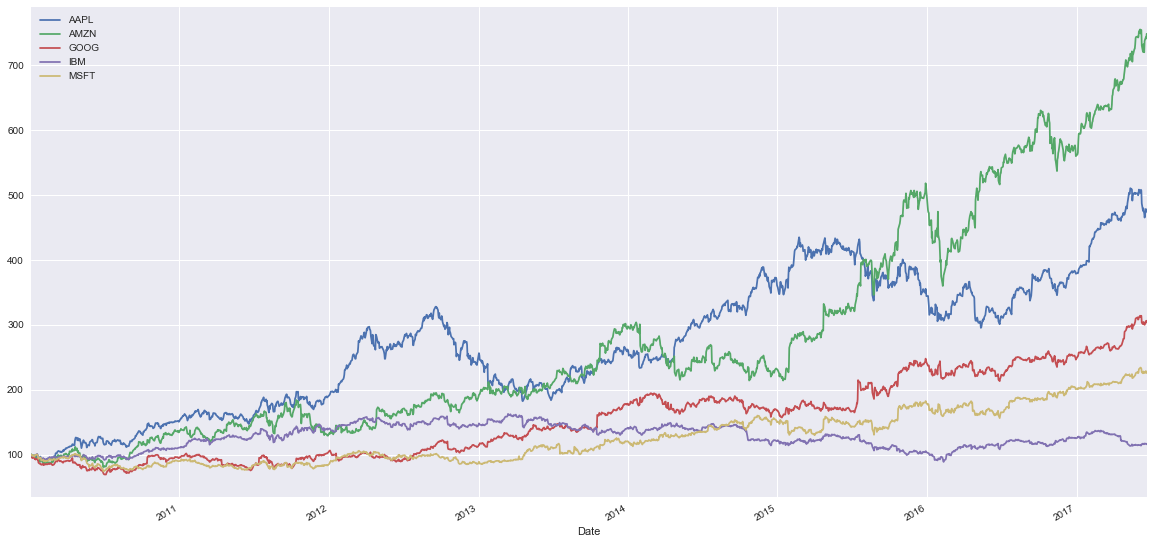

In [55]:
(data / data.ix[0] * 100).plot(figsize=(20, 10));

## Portfolio Returns

To calculate a portfolio return, let's compute the annualized returns of the stocks based on the log returns for the respective time series.

##### vectorized calculation of the log returns

In [56]:
log_rets = np.log(data / data.shift(1))

##### Annualized average log returns

In [57]:
rets = log_rets.mean() * 252
rets

AAPL    0.209358
AMZN    0.269832
GOOG    0.149873
IBM     0.020565
MSFT    0.109951
dtype: float64

An equal weighting scheme can be used to represent a portfolio by (normalized) weightings for the single stocks

##### The equal weightings

In [58]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

##### portfolio return (equal weights)

In [59]:
np.dot(weights, rets)

0.15191576153175598

## Portfolio Variance

The annualized covariance matrix can be calculted in python like this:

In [60]:
log_rets.cov() * 252

,AAPL,AMZN,GOOG,IBM,MSFT
AAPL,0.066404,0.026914,0.025937,0.018154,0.022825
AMZN,0.026914,0.099293,0.039561,0.020288,0.028944
GOOG,0.025937,0.039561,0.058881,0.018293,0.026213
IBM,0.018154,0.020288,0.018293,0.035988,0.020930
MSFT,0.022825,0.028944,0.026213,0.020930,0.051396


##### Calculating the portfolio variance with Numpy

In [61]:
pvar = np.dot(weights.T, np.dot(log_rets.cov() * 252, weights))

pvar

0.032323275037566573

The portfolio volatility, in this case, is:

In [62]:
pvol = pvar ** 0.5

pvol

0.17978674878190154

## Random Portfolio Compositions

First, generate a random portfolio composition before calculating the portfolio return and variance.

In [63]:
# random numbers
weights = np.random.random(5)
weights /= np.sum(weights)

In [64]:
# generated portfolio composition
weights

array([ 0.11868721,  0.47929223,  0.17355775,  0.06562697,  0.16283584])

##### portfolio return (random weights)

In [65]:
np.dot(weights, rets)

0.19944160482808754

##### portfolio variance (random weights)

In [66]:
np.dot(weights.T, np.dot(log_rets.cov() * 252, weights))

0.047053865070389181

The Monte Carlo method is implemented to collect the resulting portfolio returns and volatilities.

In [67]:
%%time
prets = []
pvols = []
for p in xrange(5000):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    prets.append(np.sum(log_rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(log_rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)
portfolio = pd.DataFrame({'return': prets, 'volatility': pvols})

CPU times: user 6.15 s, sys: 81.2 ms, total: 6.23 s
Wall time: 6.54 s


##### The results allow for an insightful visualization that can show the area of the minimum variance portfolio as well as the efficient frontier.

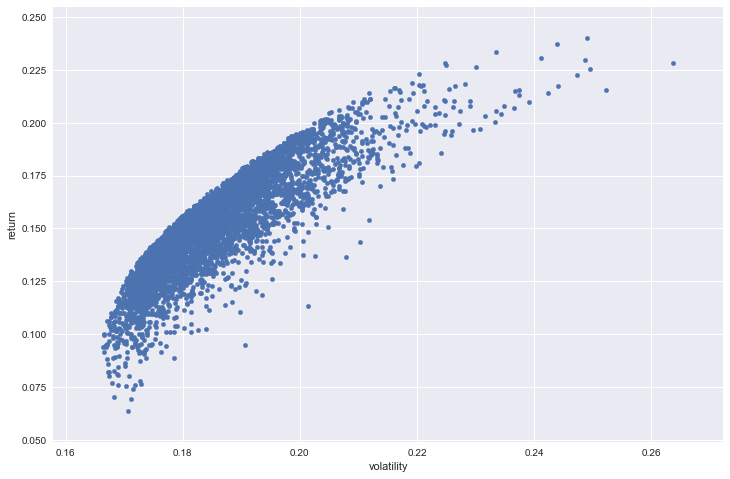

In [68]:
portfolio.plot(x='volatility', y='return', kind='scatter', figsize=(12, 8));